In [193]:
import pandas as pd

In [194]:
#loading the data
fake=pd.read_csv('data/Fake.csv')
real=pd.read_csv('data/True.csv')

In [195]:
fake.head()
#adding the labels to each of the datasets
fake['label']=0
real['label']=1

In [196]:
#combining the data
df=pd.concat([fake,real])
df.sample(3)

title  \
965   Bernie Sanders backs 'millionaires' tax' to fi...   
9400  CROOKED DEMOCRAT Congresswoman Corrine Brown F...   
4691  Planned Parenthood sees brief reprieve after h...   

                                                   text       subject  \
965   NEW YORK (Reuters) - New York City Mayor Bill ...  politicsNews   
9400  Celebrated Congressional Black Caucus member, ...      politics   
4691  NEW YORK (Reuters) - Planned Parenthood, the n...  politicsNews   

                   date  label  
965   October 30, 2017       1  
9400       Nov 18, 2017      0  
4691    March 25, 2017       1

In [197]:
#checking for the null data in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


There are no null data

In [198]:
df.isnull().sum()#no null data

title      0
text       0
subject    0
date       0
label      0
dtype: int64

**NLTK package for tokenizing articles**
____________________________________
Step 1: Import the dataset.\
 Step 2:  Import  the  English  stop  words  and add update the stop words to it.\
Step  3:  Separate  each  article  into  tokens  (removes whitespaces).\
Step 4: Convert all words to lowercase.\
Step 5: Remove the punctuation and stop words. \
Step 6: Remove the numbers. \
Step 7: Convert to lemmatized words (root form) \
Step 8: Create the n-grams. \
Step 9: Stop.
___________________________________________
**TF-IDF(Term Frequency- Inverse Document Frequency)**
___________________________________________________
- It is a well known method for grading the data/words in a machine learning mechanism, especially with textual data.
- It is a scoring mechanism to measure the frequency of occurence of a particular word in a document.
- $TF('aju')=\frac{\text{No of Times term 'aju' appeared in document}}{\text{Length of Document}}$
- Inverse data frequency is a process to measure how the occured word is termed as rare or common in the document which is called as Corpus.
- $IDF('aju')=log_e(\frac{\text{No of documents in Corpes}}{\text{No of documents with term 'aju' in it}})$
- $TF-IDF('aju')=TF('aju')*IDF('aju')$
- for high TF, word is considered highly pertinet and given high value and low frequency of occurence.

In [199]:
#find the dupklicates in the data
num_duplicates = df.duplicated().sum()
print("The number of the duplicates in the data are:",num_duplicates)

The number of the duplicates in the data are: 209


In [200]:
#dropping the duplicats
df.drop_duplicates(inplace=True)
num_duplicates=df.duplicated().sum()
num_duplicates

np.int64(0)

Total duplicate texts: 10990
Duplicate texts with different labels: 627


C:\Users\Acer\AppData\Local\Temp\ipykernel_21836\1680246237.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duplicate_counts.index, y=duplicate_counts.values, palette='Set2')


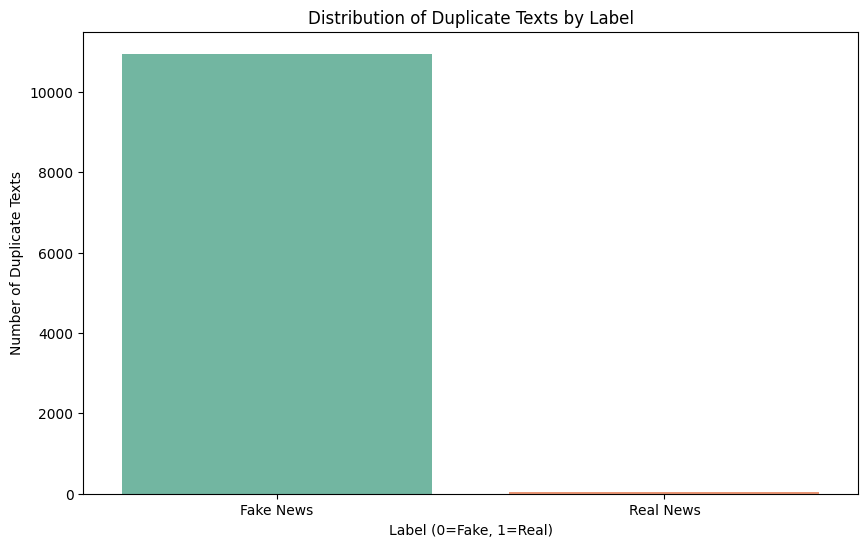


Duplicate texts with different labels:
      text  label   subject
10923           0  politics
11041           0  politics
11190           0  politics
11225           0  politics
11236           0  politics
11241           0  politics
11247           0  politics
11249           0  politics
11267           0  politics
11268           0  politics


In [201]:
# analyzing the duplicates in the text with different labels
import numpy as np
import matplotlib.pyplot as plt


# Find duplicate texts
duplicates_text = df[df.duplicated(subset=['text'], keep=False)]

# Check duplicates with different labels
duplicates_diff_labels = duplicates_text[duplicates_text.groupby('text')['label'].transform('nunique') > 1]

print(f"Total duplicate texts: {len(duplicates_text)}")
print(f"Duplicate texts with different labels: {len(duplicates_diff_labels)}")

# Count duplicates by label
duplicate_counts = duplicates_text['label'].value_counts()

# Plot the duplicates
plt.figure(figsize=(10, 6))
sns.barplot(x=duplicate_counts.index, y=duplicate_counts.values, palette='Set2')
plt.xlabel('Label (0=Fake, 1=Real)')
plt.ylabel('Number of Duplicate Texts')
plt.title('Distribution of Duplicate Texts by Label')
plt.xticks([0, 1], ['Fake News', 'Real News'])
plt.show()

# Show examples of duplicates with different labels
print("\nDuplicate texts with different labels:")
print(duplicates_diff_labels[['text', 'label', 'subject']].head(10))

In [202]:
# Drop duplicate texts, keep first occurrence
df = df.drop_duplicates(subset=['text'], keep='first')

# Remove conflicting duplicates
duplicates = df[df.duplicated(subset=['text'], keep=False)].copy()
conflicting = duplicates[duplicates.groupby('text')['label'].transform('nunique') > 1]
df = df[~df.index.isin(conflicting.index)]

print(f"Total rows: {len(df)}")
print(df['label'].value_counts())

Total rows: 38646
label
1    21191
0    17455
Name: count, dtype: int64


In [203]:
df['label'].value_counts()

label
1    21191
0    17455
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='label'>

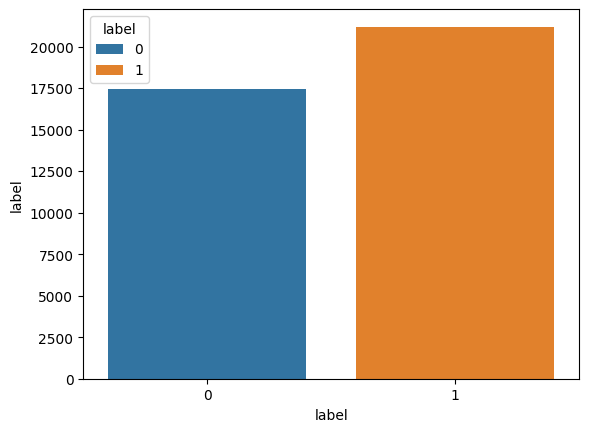

In [204]:
#checking the imbalance of the datasets
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=df,x='label',y='label',width=0.8,estimator=len,hue='label')


In [205]:
'''from above we can conclude that there is no imbalance of the dataset'''
#various news categories
df['subject'].value_counts()

subject
politicsNews       11213
worldnews           9978
News                9050
politics            6425
US_News              783
left-news            683
Government News      514
Name: count, dtype: int64

C:\Users\Acer\AppData\Local\Temp\ipykernel_21836\2443971095.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')


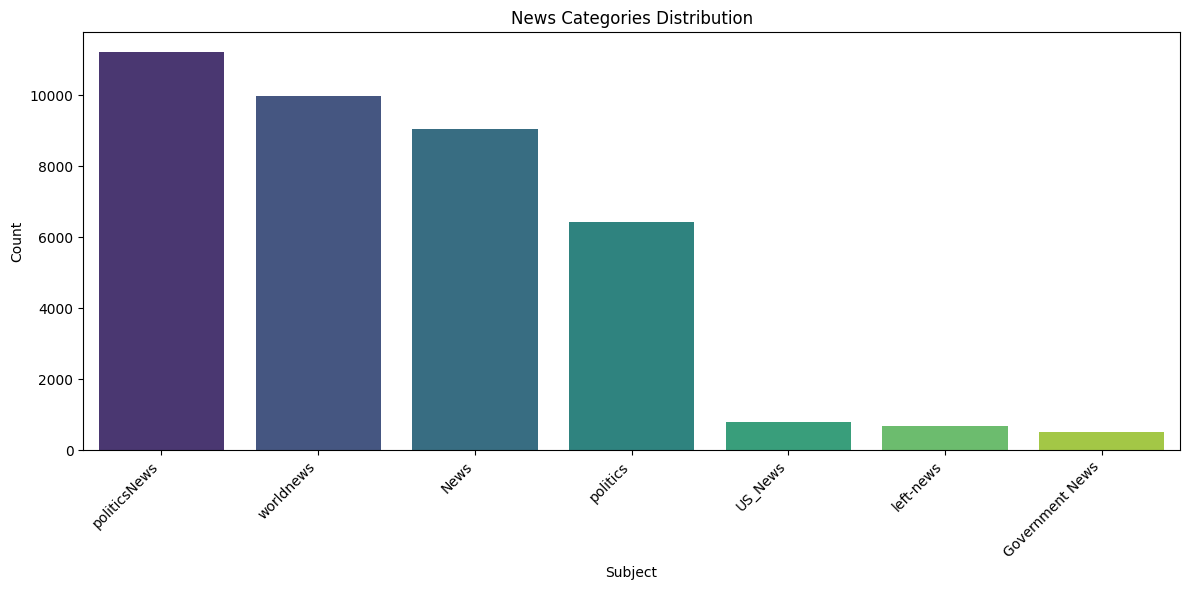

In [206]:
'''from above we can conclude that there is no imbalance of the dataset'''
#various news categories
subject_counts = df['subject'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.title('News Categories Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [207]:
subject_counts = df[df['label']==0]['subject'].value_counts()
subject_counts

subject
News               9050
politics           6425
US_News             783
left-news           683
Government News     514
Name: count, dtype: int64

C:\Users\Acer\AppData\Local\Temp\ipykernel_21836\2969175416.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')


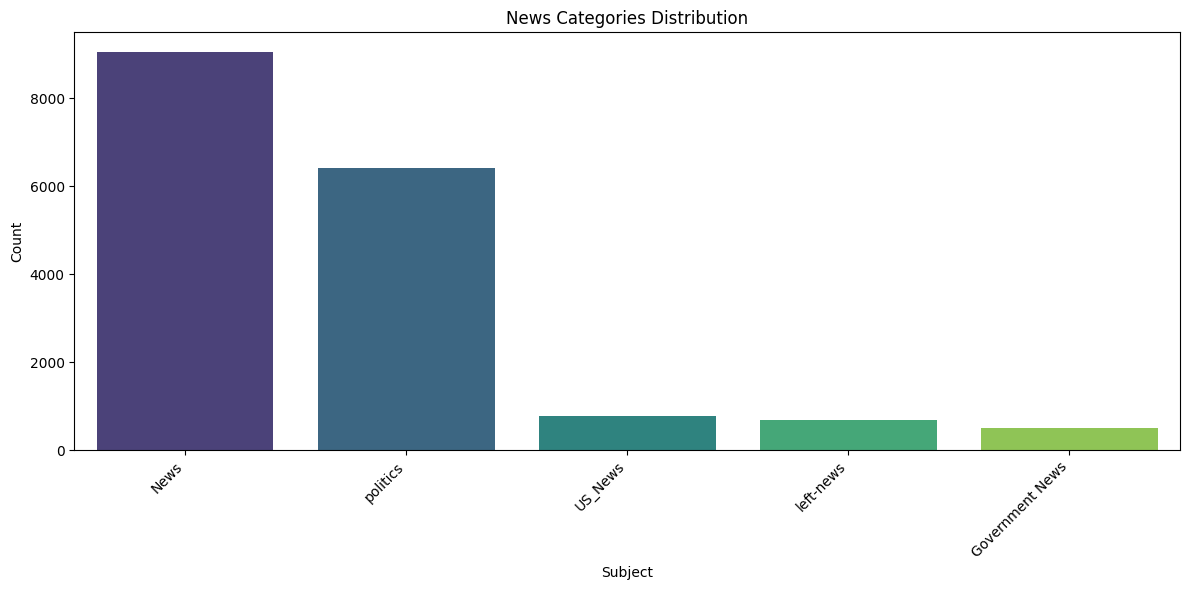

In [208]:
#various news categories among the fake newz
subject_counts = df[df['label']==0]['subject'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.title('News Categories Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [209]:
'''we have got politicsnews and news 
lets see if they are same'''
# Show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(df[df['subject']=='politicsNews'])
print("-------------------------------------------------")
print(df[df['subject']=='politics'])


                                                   title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
5      White House, Congress prepare for talks on spe...   
6      Trump says Russia probe will be fair, but time...   
7      Factbox: Trump on Twitter (Dec 29) - Approval ...   
8             Trump on Twitter (Dec 28) - Global Warming   
9      Alabama official to certify Senator-elect Jone...   
10     Jones certified U.S. Senate winner despite Moo...   
11     New York governor questions the constitutional...   
12     Factbox: Trump on Twitter (Dec 28) - Vanity Fa...   
13        Trump on Twitter (Dec 27) - Trump, Iraq, Syria   
14     Man says he delivered manure to Mnuchin to pro...   
15     Virginia officials postpone lotte

In [210]:
# Replace 'politicsNews' with 'politics' in the subject column
df['subject'] = df['subject'].replace({'politicsNews': 'politics'})

# Verify the replacement
print(df['subject'].value_counts())

subject
politics           17638
worldnews           9978
News                9050
US_News              783
left-news            683
Government News      514
Name: count, dtype: int64


In [211]:
df['date']=pd.to_datetime(df['date'],errors='ignore')

C:\Users\Acer\AppData\Local\Temp\ipykernel_21836\3892171334.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['date']=pd.to_datetime(df['date'],errors='ignore')


In [212]:
df['date']

0                                        December 31, 2017
1                                        December 31, 2017
2                                        December 30, 2017
3                                        December 29, 2017
4                                        December 25, 2017
5                                        December 25, 2017
6                                        December 23, 2017
7                                        December 23, 2017
8                                        December 22, 2017
9                                        December 21, 2017
10                                       December 21, 2017
11                                       December 21, 2017
12                                       December 21, 2017
13                                       December 20, 2017
14                                       December 20, 2017
15                                       December 20, 2017
16                                       December 19, 20

In [213]:
# Method 1: Chain multiple replacements
df['date'] = df['date'].str.replace('Jan ', 'January')
df['date'] = df['date'].str.replace('Feb ', 'February')
df['date'] = df['date'].str.replace('Mar ', 'March')
df['date'] = df['date'].str.replace('Apr ', 'April')
df['date'] = df['date'].str.replace('Jun ', 'June')
df['date'] = df['date'].str.replace('Jul ', 'July')
df['date'] = df['date'].str.replace('Aug ', 'August')
df['date'] = df['date'].str.replace('Oct ', 'October')
df['date'] = df['date'].str.replace('Nov ', 'November')
df['date'] = df['date'].str.replace('Dec ', 'December')

# Verify
print(df['date'].head())

0    December 31, 2017
1    December 31, 2017
2    December 30, 2017
3    December 29, 2017
4    December 25, 2017
Name: date, dtype: object


In [215]:
df['date']=pd.to_datetime(df['date'],errors='coerce')
df['date']

0       2017-12-31
1       2017-12-31
2       2017-12-30
3       2017-12-29
4       2017-12-25
5       2017-12-25
6       2017-12-23
7       2017-12-23
8       2017-12-22
9       2017-12-21
10      2017-12-21
11      2017-12-21
12      2017-12-21
13      2017-12-20
14      2017-12-20
15      2017-12-20
16      2017-12-19
17      2017-12-17
18      2017-12-17
19      2017-12-16
20      2017-12-16
21      2017-12-13
22      2017-12-12
23      2017-12-12
24      2017-12-12
25      2017-12-12
26      2017-12-11
27      2017-12-10
28      2017-12-09
29      2017-12-07
30      2017-12-07
31      2017-12-07
32      2017-12-06
33      2017-12-06
34      2017-12-06
35      2017-12-05
36      2017-12-05
37      2017-12-05
38      2017-12-05
39      2017-12-04
40      2017-12-03
41      2017-12-03
42      2017-12-02
43      2017-12-02
44      2017-12-01
45      2017-12-01
46      2017-12-01
47      2017-12-01
48      2017-11-30
49      2017-11-30
50      2017-11-30
51      2017-11-29
52      2017